In [9]:
import pandas as pd
import numpy as np

In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 3s 0us/step


In [7]:
#encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
    


In [10]:
#vectorize data and corresponding labels
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
#create a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [12]:
from keras import models
from keras import layers
#define the architecture of the network
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
#compile the model
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])
#train the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20



30/30 [==============================] - 6s 124ms/step - loss: 0.5477 - binary_accuracy: 0.7653 - val_loss: 0.4368 - val_binary_accuracy: 0.8493
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3519 - binary_accuracy: 0.8888 - val_loss: 0.3288 - val_binary_accuracy: 0.8822
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2623 - binary_accuracy: 0.9151 - val_loss: 0.2919 - val_binary_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2122 - binary_accuracy: 0.9305 - val_loss: 0.2838 - val_binary_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1795 - binary_accuracy: 0.9407 - val_loss: 0.2810 - val_binary_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1527 - binary_accuracy: 0.9505 - val_loss: 0.2854 - val_binary_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1308 

In [16]:
from keras import losses
from keras import metrics

In [18]:
from tensorflow.keras import optimizers, losses, metrics


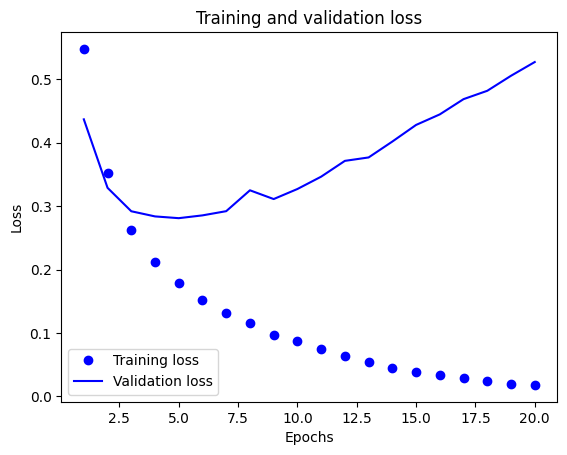

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')


KeyError: 'loss_value'

<Figure size 640x480 with 0 Axes>

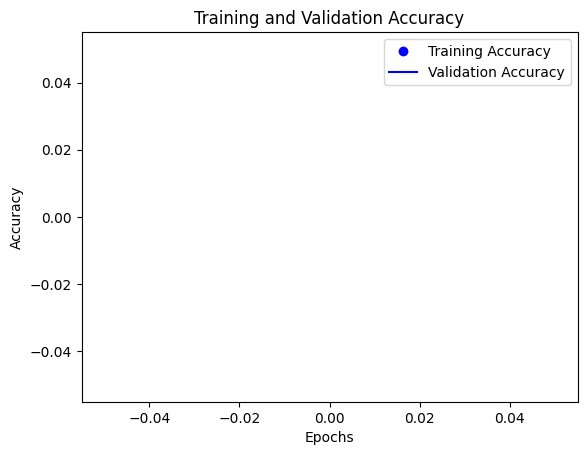

In [26]:
import matplotlib.pyplot as plt

# Clear the current figure
plt.clf()

# Retrieve accuracy values from history
acc_values = history_dict.get('acc', [])  # Default to empty list if key doesn't exist
val_acc_values = history_dict.get('val_acc', [])  # Default to empty list if key doesn't exist

# Create a range of epoch numbers
epochs = range(1, len(acc_values) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [27]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


KeyError: 'acc'

<Figure size 640x480 with 0 Axes>

In [28]:
#evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_acc)

782/782 [==============================] - 2s 2ms/step - loss: 0.5713 - binary_accuracy: 0.8600
Test Loss:  0.571276068687439
Test Accuracy:  0.8600000143051147
